In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')


In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

## EDA

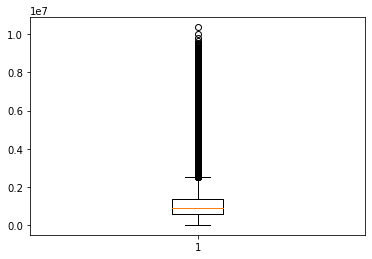

In [4]:
plt.boxplot(train['Avg_Account_Balance'])
plt.show()

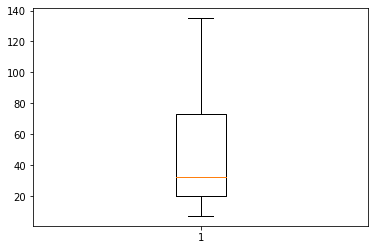

In [5]:
plt.boxplot(train['Vintage'])
plt.show()

## feature engineering

### creating deep copy of train dataset

In [6]:
def data_preprocessing(x):
    x1 = x.copy(deep=True)
    x1['Gender'] = x1['Gender'].map({'Male':0, 'Female':1})
    x1['Is_Active'] = x1['Is_Active'].map({'No':0, 'Yes':1})
    x1 = pd.get_dummies(x1,columns = ['Region_Code','Occupation','Channel_Code'])
    #x1 = pd.get_dummies(x1,columns = ['Region_Code'])
    x1 = pd.get_dummies(x1,columns = ['Credit_Product'],dummy_na=True)
    x2 = x1.copy(deep=True)
    x3 = x2[(x2['Avg_Account_Balance']>x2['Avg_Account_Balance'].quantile(0.03)) & (x2['Avg_Account_Balance']<x2['Avg_Account_Balance'].quantile(0.91))]
    want = str(input('what you want |-->train dataset| or |-->test dataset| : '))
    if want == 'train dataset':
        return x3
    elif want == 'test dataset':
        return x2


In [7]:
train_clean = data_preprocessing(train)

what you want |-->train dataset| or |-->test dataset| : train dataset


In [8]:
train_clean.shape

(216235, 53)

In [9]:
train_clean.head()

,ID,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
0,NNVBBKZB,1,73,43,1045696,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,IDD62UNG,1,30,32,581988,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,HD3DSEMC,1,56,26,1484315,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,BF3NC7KV,0,34,19,470454,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,TEASRWXV,1,30,33,886787,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [10]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216235 entries, 0 to 245724
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        216235 non-null  object
 1   Gender                    216235 non-null  int64 
 2   Age                       216235 non-null  int64 
 3   Vintage                   216235 non-null  int64 
 4   Avg_Account_Balance       216235 non-null  int64 
 5   Is_Active                 216235 non-null  int64 
 6   Is_Lead                   216235 non-null  int64 
 7   Region_Code_RG250         216235 non-null  uint8 
 8   Region_Code_RG251         216235 non-null  uint8 
 9   Region_Code_RG252         216235 non-null  uint8 
 10  Region_Code_RG253         216235 non-null  uint8 
 11  Region_Code_RG254         216235 non-null  uint8 
 12  Region_Code_RG255         216235 non-null  uint8 
 13  Region_Code_RG256         216235 non-null  uint8 
 14  Regi

In [11]:
train_clean.describe().round(2)

,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
count,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,...,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00,216235.00
mean,0.45,43.59,46.23,947763.71,0.38,0.24,0.01,0.02,0.02,0.01,...,0.28,0.30,0.41,0.43,0.28,0.27,0.02,0.59,0.29,0.12
std,0.50,14.66,31.95,433316.16,0.49,0.42,0.10,0.15,0.13,0.09,...,0.45,0.46,0.49,0.49,0.45,0.45,0.15,0.49,0.45,0.32
min,0.00,23.00,7.00,308856.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,30.00,20.00,604318.50,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,43.00,32.00,854631.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,53.00,73.00,1216367.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00
max,1.00,85.00,135.00,2130464.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [12]:
train_clean.isnull().sum()

ID                          0
Gender                      0
Age                         0
Vintage                     0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                     0
Region_Code_RG250           0
Region_Code_RG251           0
Region_Code_RG252           0
Region_Code_RG253           0
Region_Code_RG254           0
Region_Code_RG255           0
Region_Code_RG256           0
Region_Code_RG257           0
Region_Code_RG258           0
Region_Code_RG259           0
Region_Code_RG260           0
Region_Code_RG261           0
Region_Code_RG262           0
Region_Code_RG263           0
Region_Code_RG264           0
Region_Code_RG265           0
Region_Code_RG266           0
Region_Code_RG267           0
Region_Code_RG268           0
Region_Code_RG269           0
Region_Code_RG270           0
Region_Code_RG271           0
Region_Code_RG272           0
Region_Code_RG273           0
Region_Code_RG274           0
Region_Code_RG275           0
Region_Cod

**test dataset**

In [13]:
test_clean = data_preprocessing(test)

what you want |-->train dataset| or |-->test dataset| : test dataset


In [14]:
test_clean.shape

(105312, 52)

In [15]:
test_clean.head()

,ID,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
0,VBENBARO,0,29,25,742366,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,CCMEWNKY,0,43,49,925537,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,VK3KGA9M,0,31,14,215949,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,TT8RPZVC,0,29,33,868070,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,SHQZEYTZ,1,29,19,657087,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [16]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105312 non-null  object
 1   Gender                    105312 non-null  int64 
 2   Age                       105312 non-null  int64 
 3   Vintage                   105312 non-null  int64 
 4   Avg_Account_Balance       105312 non-null  int64 
 5   Is_Active                 105312 non-null  int64 
 6   Region_Code_RG250         105312 non-null  uint8 
 7   Region_Code_RG251         105312 non-null  uint8 
 8   Region_Code_RG252         105312 non-null  uint8 
 9   Region_Code_RG253         105312 non-null  uint8 
 10  Region_Code_RG254         105312 non-null  uint8 
 11  Region_Code_RG255         105312 non-null  uint8 
 12  Region_Code_RG256         105312 non-null  uint8 
 13  Region_Code_RG257         105312 non-null  uint8 
 14  Regi

In [17]:
test_clean.describe().round(2)

,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
count,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,...,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00,105312.00
mean,0.45,43.87,46.84,1134194.63,0.39,0.01,0.03,0.02,0.01,0.11,...,0.29,0.29,0.41,0.42,0.28,0.28,0.02,0.59,0.30,0.12
std,0.50,14.87,32.27,866242.99,0.49,0.10,0.16,0.13,0.09,0.31,...,0.45,0.46,0.49,0.49,0.45,0.45,0.15,0.49,0.46,0.32
min,0.00,24.00,7.00,22597.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,30.00,20.00,603982.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,43.00,32.00,896634.50,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,54.00,73.00,1371598.25,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00
max,1.00,85.00,135.00,9908858.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [18]:
test_clean.isnull().sum()

ID                          0
Gender                      0
Age                         0
Vintage                     0
Avg_Account_Balance         0
Is_Active                   0
Region_Code_RG250           0
Region_Code_RG251           0
Region_Code_RG252           0
Region_Code_RG253           0
Region_Code_RG254           0
Region_Code_RG255           0
Region_Code_RG256           0
Region_Code_RG257           0
Region_Code_RG258           0
Region_Code_RG259           0
Region_Code_RG260           0
Region_Code_RG261           0
Region_Code_RG262           0
Region_Code_RG263           0
Region_Code_RG264           0
Region_Code_RG265           0
Region_Code_RG266           0
Region_Code_RG267           0
Region_Code_RG268           0
Region_Code_RG269           0
Region_Code_RG270           0
Region_Code_RG271           0
Region_Code_RG272           0
Region_Code_RG273           0
Region_Code_RG274           0
Region_Code_RG275           0
Region_Code_RG276           0
Region_Cod

**scaling the dataset**

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale = MinMaxScaler()

In [21]:

def scaling(x):
    x1= x.copy(deep=True)
    x1['Avg_Account_Balance'] = scale.fit_transform(x1['Avg_Account_Balance'].values.reshape(-1,1))
    x1['Vintage'] = scale.fit_transform(x1['Vintage'].values.reshape(-1,1))
    x1['Age'] = scale.fit_transform(x1['Age'].values.reshape(-1,1))
    
    return x1

In [22]:
train_scale = scaling(train_clean)

In [23]:
train_scale.head()

,ID,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
0,NNVBBKZB,1,0.806452,0.281250,0.404500,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,IDD62UNG,1,0.112903,0.195312,0.149940,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,HD3DSEMC,1,0.532258,0.148438,0.645286,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,BF3NC7KV,0,0.177419,0.093750,0.088712,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,TEASRWXV,1,0.112903,0.203125,0.317264,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [24]:
test_scale = scaling(test_clean)

In [25]:
test_scale.head()

,ID,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
0,VBENBARO,0,0.081967,0.140625,0.072805,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,CCMEWNKY,0,0.311475,0.328125,0.091333,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,VK3KGA9M,0,0.114754,0.054688,0.019558,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,TT8RPZVC,0,0.081967,0.203125,0.085520,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,SHQZEYTZ,1,0.081967,0.093750,0.064179,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


# .

**creating the train and test dataset**

In [26]:
X = train_scale.drop(['ID','Is_Lead'],axis='columns')
X.head()

,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan
0,1,0.806452,0.281250,0.404500,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0.112903,0.195312,0.149940,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,1,0.532258,0.148438,0.645286,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,0.177419,0.093750,0.088712,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,1,0.112903,0.203125,0.317264,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [27]:
Y = train_scale[['Is_Lead']]
Y.head()

,Is_Lead
0,0
1,0
2,0
3,0
4,0


**spliting the data into training and testing**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
print(x_train.shape,' - x_train, ',x_test.shape,' - x_test, ',y_train.shape,' - y_train, ',y_test.shape,' - y_test')

(172988, 51)  - x_train,  (43247, 51)  - x_test,  (172988, 1)  - y_train,  (43247, 1)  - y_test


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model=RandomForestClassifier(n_estimators=300,oob_score=True)
features = X.columns
rf_model.fit(X,Y)
print('oob score  = ',rf_model.oob_score_)

C:\Users\ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


oob score  =  0.8514440307998242


In [31]:
rf_dict = {}
for features,imp in zip(features,rf_model.feature_importances_):
    rf_dict[features]=imp*100

In [32]:
rf_dict1 = rf_dict

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

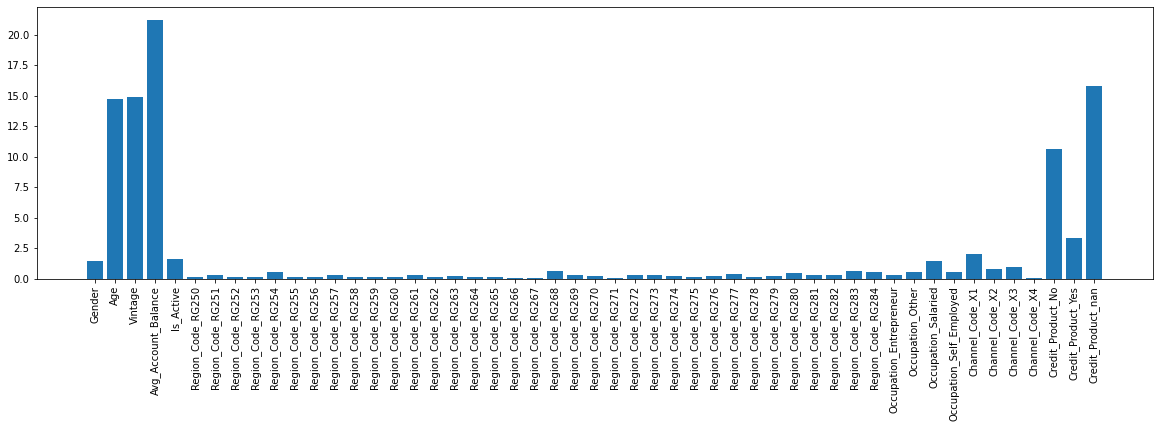

In [37]:
plt.figure(figsize=(20,5))
plt.bar(rf_dict.keys(),rf_dict.values())
plt.xticks(rotation='vertical')

**sorting the feature importance in descending order**

In [33]:
rf_dict1 = sorted(rf_dict.items(), key=lambda x:x[1],reverse=True)

In [34]:
rf_dict1 = pd.DataFrame(rf_dict1)

In [35]:
rf_dict1.columns = [['columns','importance feature']]

In [36]:
rf_dict1

,columns,importance feature
0,Avg_Account_Balance,21.157646
1,Credit_Product_nan,15.191899
2,Vintage,15.097045
3,Age,14.801790
4,Credit_Product_No,10.620131
5,Credit_Product_Yes,3.567797
6,Channel_Code_X1,2.125156
7,Is_Active,1.614426
8,Occupation_Salaried,1.555082
9,Gender,1.516236


**below features hace importance greater than 0.5 i take these small features also.
these feature may have less importance because we dummied the individual catagories which leads to this and we haven't dummied these they some importance.
that's why i look some not the all**

In [38]:
x_train_cleaned = x_train[['Avg_Account_Balance','Credit_Product_nan','Vintage','Age','Credit_Product_No','Credit_Product_Yes','Channel_Code_X1','Is_Active','Occupation_Salaried','Gender','Channel_Code_X3','Channel_Code_X2','Region_Code_RG268','Region_Code_RG283','Occupation_Other','Occupation_Self_Employed','Region_Code_RG254','Region_Code_RG284']]

y_train_cleaned = y_train


In [39]:
x_train_cleaned.shape, y_train_cleaned.shape

((172988, 18), (172988, 1))

### modeling of the part

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC         
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

**hyperparameter tunning**
**not using this because i take a lot of time and some time crash my laptop**

**my laptop specification**
    
       I3 WITH NVIDIA GEFORCE 

In [41]:
lr_cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=9)

In [42]:
lr_cv

ShuffleSplit(n_splits=5, random_state=9, test_size=0.2, train_size=None)

In [43]:
def find_best_model_using_gridsearch(x,y):
    algos={
        'logistic_classifier' : {        
        'model'  : LogisticRegression(),
        'params' : { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    'penalty' : ['l1', 'l2', 'elasticnet'],
                   }
                              },
        'svm' : {
            'model'  : SVC(),
            'params' : {'C' : [1,3,5,10],
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                       'gamma' : ['scale', 'auto']}
                   },
        'decision_tree' : {
            'model'  : DecisionTreeClassifier(),
            'params' : { 'criterion' : ['mse','friedman_mse'],
                        'splitter' : ['best', 'random']
                       }
                          },
        'gradient boosting classifier':{
            'model': GradientBoostingClassifier(),
            'params' : {'loss' : ['deviance', 'exponential'],
                       'criterion' : ['friedman_mse', 'mse', 'mae'],
                       'warm_start' : [False,True]}
        },
        'KNN' : {
            'model'  : KNeighborsClassifier(),
            'params' : { 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'n_neighbors': [5,7,9]
                       }
        },
        ' Stochastic gradient descent' : {
            'model'  : SGDClassifier(),
            'params' : { 'loss' : [ 'hinge', 'log'],
                        'penalty' : ['l2', 'l1', 'elasticnet'],
                        'learning_rate': [ 'constant','optimal','invscaling','adaptive']
                       }
        }
        
    }
    scores=[]
    lr_cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=9)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=lr_cv,return_train_score=False)
        gs.fit(x,y)
        scores.append(
                     {
                         'model':algo_name,
                         'best_score':gs.best_score_,
                         'best_params': gs.best_params_
                     }
                     )

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

if don't have xgboost you can install

## ROC_AUC score

In [67]:
x_train_final,x_test_final,y_train_final,y_test_final = train_test_split(x_train_cleaned,y_train_cleaned,test_size = 0.2, random_state = True)

In [47]:
cross_val_score(LogisticRegression(solver='sag'),x_train_final,y_train_final)

array([0.85128983, 0.85425247, 0.85540863, 0.85150661, 0.85439699])

In [48]:
cross_val_score(RandomForestClassifier(n_estimators=300),x_train_final,y_train_final)

array([0.84572585, 0.84872462, 0.84868849, 0.8438471 , 0.84680974])

In [49]:
cross_val_score(XGBClassifier(use_label_encoder=False),x_train_final,y_train_final)

[11:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.85822675, 0.85970807, 0.8614423 , 0.85678156, 0.85858805])

In [50]:
cross_val_score(GradientBoostingClassifier(n_estimators=150),x_train_final,y_train_final)

array([0.85775706, 0.8618036 , 0.86245393, 0.85786545, 0.8601055 ])

** **

**from above we can check that xgboost and gradient boositng work nearly same but xgboost worked a little better**

after getting the best model
 we will now implement on the whole train dataset which we imported in the begning with important feature and scaled feataure
 

In [52]:
new_x = X[['Avg_Account_Balance','Credit_Product_nan','Vintage','Age','Credit_Product_No','Credit_Product_Yes','Channel_Code_X1','Is_Active','Occupation_Salaried','Gender','Channel_Code_X3','Channel_Code_X2','Region_Code_RG268','Region_Code_RG283','Occupation_Other','Occupation_Self_Employed','Region_Code_RG254','Region_Code_RG284']]
new_y = Y

(new_x.shape),(new_y.shape)

((216235, 18), (216235, 1))

**editing test data which we imported in the begning**

In [51]:
new_test = test_scale[['Avg_Account_Balance','Credit_Product_nan','Vintage','Age','Credit_Product_No','Credit_Product_Yes','Channel_Code_X1','Is_Active','Occupation_Salaried','Gender','Channel_Code_X3','Channel_Code_X2','Region_Code_RG268','Region_Code_RG283','Occupation_Other','Occupation_Self_Employed','Region_Code_RG254','Region_Code_RG284']]

In [53]:
model = XGBClassifier(use_label_encoder=False).fit(new_x,new_y)

[11:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y_test_final,model.predict(x_test))

0.7697600142944836

**preparing the submission csv**

In [57]:
pred = model.predict(new_test)

In [59]:
sub = pd.read_csv('sample_submission_eyYijxG.csv')

In [60]:
sub.Is_Lead = pred

In [61]:
sub.to_csv('submission.csv',index=False)

** **

**above we have checked for the features with zero leass than zero importance now we will check for feature with importance greater than or equal to one**

In [62]:
x_train_cleaned1 = x_train[['Avg_Account_Balance','Credit_Product_nan','Vintage','Age','Credit_Product_No','Credit_Product_Yes','Channel_Code_X1','Is_Active','Occupation_Salaried','Gender']]

y_train_cleaned1 = y_train


In [63]:
x_train_cleaned1.shape, y_train_cleaned1.shape

((172988, 10), (172988, 1))

### modeling of the part 2

###### ROC_AUC score

In [68]:
x_train_final1,x_test_final1,y_train_final1,y_test_final1 = train_test_split(x_train_cleaned1,y_train_cleaned1,test_size = 0.2, random_state = True)

In [70]:
cross_val_score(LogisticRegression(solver='sag'),x_train_final1,y_train_final1)

array([0.84962786, 0.85222921, 0.85378279, 0.85103692, 0.85432473])

In [71]:
cross_val_score(RandomForestClassifier(n_estimators=300),x_train_final1,y_train_final1)

array([0.83976443, 0.84290772, 0.84070381, 0.8366934 , 0.84099285])

In [72]:
cross_val_score(XGBClassifier(use_label_encoder=False),x_train_final1,y_train_final1)

[12:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.85772093, 0.8593829 , 0.85819062, 0.85457764, 0.85837127])

In [73]:
cross_val_score(GradientBoostingClassifier(n_estimators=150),x_train_final1,y_train_final1)

array([0.85649252, 0.85902161, 0.86025002, 0.85688995, 0.85862418])

**looks like this work same as the before**

** **

**the prarameters on which credit card should we given are**
    
    Avg_Account_Balance
    Credit_Product_nan, Credit_Product_No, Credit_Product_Yes
    Vintage
    Age
    Channel_Code_X1, Channel_Code_X3 , Channel_Code_X2
    Is_Active
    Occupation_Salaried, Occupation_Other, Occupation_Self_Employed
    Gender
    Region_Code_RG268,Region_Code_RG283,Region_Code_RG254,Region_Code_RG284
    
**the person should have avg account balance, into any credit product, vintage, according to ages with some channel code x1,c2,x4 but not for x4, is active not a Entrepreneur**